In [574]:
import pandas as pd
import matplotlib.pyplot as plt

In [575]:
# 한글 폰트 설정 => 폰트 매니저 모듈 사용
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
Font_file=r'C:\Windows\Fonts\gulim.ttc'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=Font_file).get_name()

# 새로운 폰트 패밀리 이름지정
rc('font',family=font_name)

In [576]:
titanicDF=pd.read_csv(r'C:\KDT\EX_PANDAS06\DAY06\titanic.csv')
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [577]:
titanicDF.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [578]:
# 중복데이터삭제
titanicDF.drop_duplicates(inplace=True)

In [579]:
# 결측치많은 deck값 삭제
titanicDF.drop('deck',axis=1,inplace=True)

# 중복되는 데이터 삭제
titanicDF.drop('embarked',axis=1,inplace=True)
titanicDF.drop('adult_male',axis=1,inplace=True)
titanicDF.drop('alive',axis=1,inplace=True)
titanicDF.drop('class',axis=1,inplace=True)

In [580]:
# age데이터 nan값 처리
manave=titanicDF[titanicDF['who']=='man']['age'].mean()
womanave=titanicDF[titanicDF['who']=='woman']['age'].mean()
chilave=titanicDF[titanicDF['who']=='child']['age'].mean()
for i in titanicDF.index:
    if pd.isna(titanicDF.loc[i,'age']):
        if titanicDF.loc[i,'who']=='man':
            titanicDF.loc[i,'age']=manave
        elif titanicDF.loc[i,'who']=='woman':
            titanicDF.loc[i,'age']=womanave
        else:
            titanicDF.loc[i,'age']=chilave

In [581]:
# 결측치있는 embarked 행 삭제
titanicDF.dropna(inplace=True,axis=0)

In [582]:
# 결측치확인
titanicDF.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
embark_town    0
alone          0
dtype: int64

In [583]:
titanicDF.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,Southampton,True


In [584]:
titanicDF['age_range']=0
for row in titanicDF.index:
    titanicDF.loc[row,'age_range']=int((titanicDF.loc[row,'age']//10)*10)

In [585]:
titanicDF_survived=titanicDF[titanicDF['survived']==1]
titanicDF_death=titanicDF[titanicDF['survived']==0]

In [586]:
man_survived_ratio=titanicDF_survived['sex'].value_counts().loc['male']/titanicDF['sex'].value_counts().loc['male']
woman_survived_ratio=titanicDF_survived['sex'].value_counts().loc['female']/titanicDF['sex'].value_counts().loc['female']

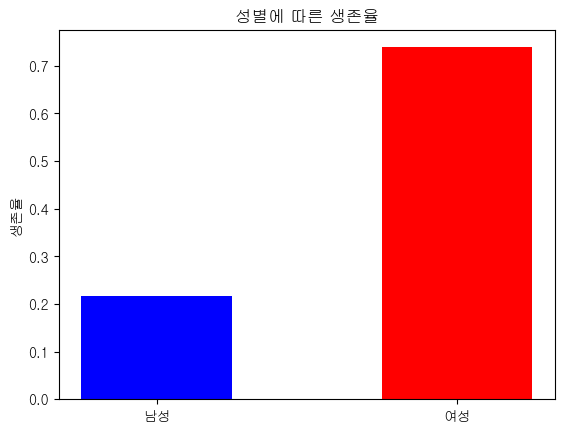

In [587]:
plt.bar(['남성','여성'],[man_survived_ratio,woman_survived_ratio],width=0.5,color=['b','r'])
plt.ylabel('생존율')
plt.title('성별에 따른 생존율')
plt.show()

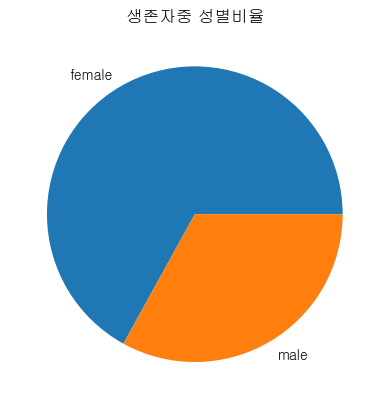

In [588]:
titanicDF_survived['sex'].value_counts()
plt.pie(titanicDF_survived['sex'].value_counts(),labels=titanicDF_survived['sex'].value_counts().index)
plt.title('생존자중 성별비율')
plt.show()

In [589]:
age_range_DF=pd.concat([titanicDF['age_range'].value_counts(),titanicDF_survived['age_range'].value_counts()],axis=1,keys=['total','survived'])
age_range_DF.sort_index(inplace=True)
age_range_DF['ratio']=age_range_DF['survived']/age_range_DF['total']

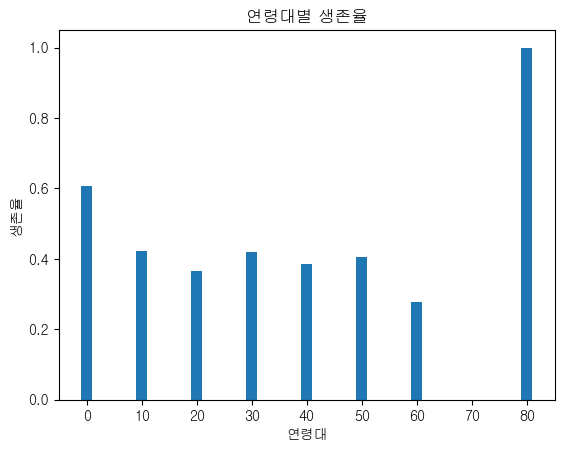

In [590]:
plt.bar(age_range_DF.index,age_range_DF['ratio'],width=2)
plt.title('연령대별 생존율')
plt.ylabel('생존율')
plt.xlabel('연령대')
plt.xticks([0,10,20,30,40,50,60,70,80])
plt.show()

In [591]:
populDF=pd.read_excel(r'C:\KDT\data\시도별 전출입 인구수.xlsx')
populDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [592]:
populDF.head()

#필요없는 0번 행 삭제
populDF.drop(0,axis=0,inplace=True)


In [593]:
# 전출지 결측치 처리
populDF['전출지별'].ffill(inplace=True)

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_19028\2828538209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  populDF['전출지별'].ffill(inplace=True)


In [594]:
# 멀티인덱스
populDF.set_index(['전출지별','전입지별'],inplace=True)

In [595]:
populDG=populDF.loc['대구광역시']
populDG.replace('-',pd.NA,inplace=True)
populDG.dropna(thresh=5,inplace=True,axis=1)
populDG.replace(pd.NA,0,inplace=True)
populDG.head()

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_19028\3019176433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  populDG.replace('-',pd.NA,inplace=True)
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_19028\3019176433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  populDG.dropna(thresh=5,inplace=True,axis=1)
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_19028\3019176433.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,481534,521117,582412,525143,518560,513581,570103,558115,517090,528024,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
서울특별시,19760,23725,32205,28897,25736,21724,20130,22080,21201,19521,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,10590,10732,10512,10804,10696,10114,10496,10019,8789,8848,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,348566,393803,438255,390862,384972,383388,429854,417433,387612,387458,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,1440,1640,1921,1927,2036,1922,2074,1927,2272,2438,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930


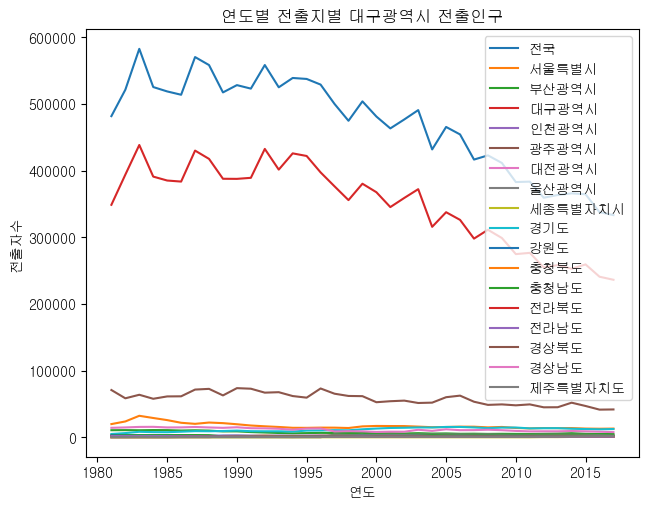

<Figure size 10000x500 with 0 Axes>

In [596]:
plt.plot(populDG.T,label=populDG.index)

plt.legend()
plt.tight_layout()
plt.title('연도별 전출지별 대구광역시 전출인구')
plt.xlabel('연도')
plt.ylabel('전출자수')
plt.figure(figsize=(100,5))
plt.show()

In [603]:
#전국 대구 뺴고
populDG1=populDG.copy()
populDG1.drop('전국',inplace=True)
populDG1.drop('대구광역시',inplace=True)
#populDG1.drop('광주광역시',inplace=True)

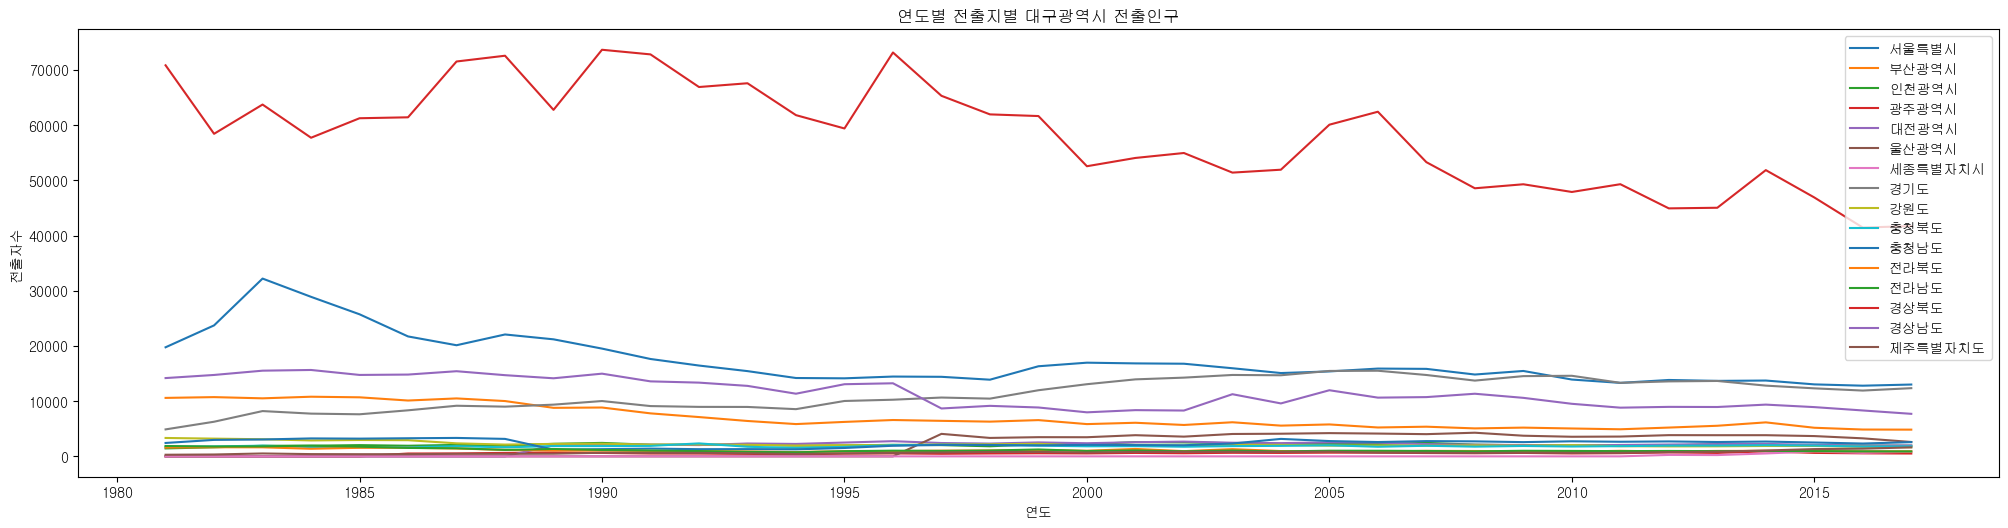

In [604]:

plt.figure(figsize=(20,5))
plt.plot(populDG1.T,label=populDG1.index)
plt.legend()
plt.tight_layout()
plt.title('연도별 전출지별 대구광역시 전출인구')
plt.xlabel('연도')
plt.ylabel('전출자수')
plt.show()

In [598]:
populDG2=populDG.copy()
populDG2.replace(0,pd.NA,inplace=True)
populDG2.dropna(axis=0,inplace=True)

In [599]:
populDG3=populDG2.copy()
for col in populDG2.columns[:-1]:
     populDG3[col]=populDG2[col+1]/populDG2[col]
populDG3.drop(2017,axis=1,inplace=True)

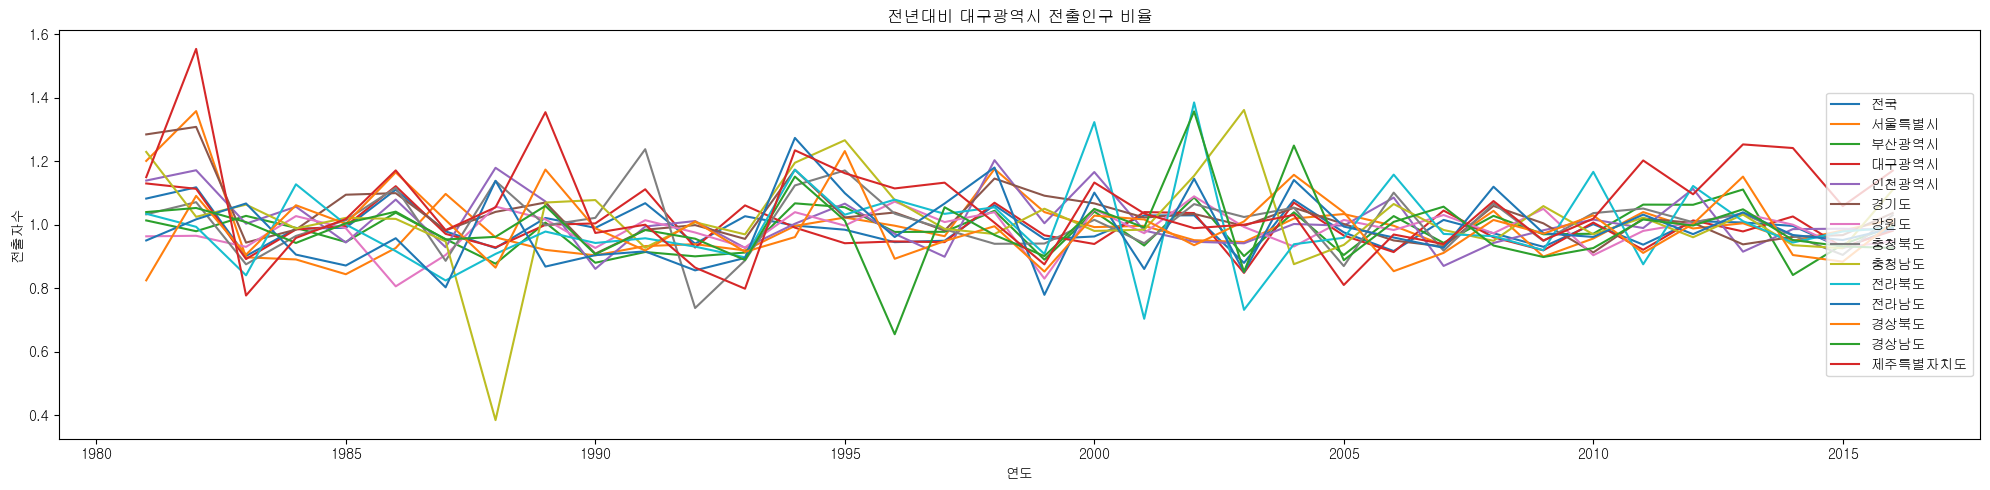

In [605]:
plt.figure(figsize=(20,5))
plt.plot(populDG3.T,label=populDG3.index)

plt.legend(loc='center right')

plt.title('전년대비 대구광역시 전출인구 비율')
plt.xlabel('연도')
plt.ylabel('전출자 비율')

plt.tight_layout()
plt.show()